<a href="https://colab.research.google.com/github/shabnajL/Tweet_Emotion_Recognition/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [5]:
!pip install nlp


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.13.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [7]:
!pip install --upgrade datasets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import datasets
dataset = datasets.load_dataset('emotion')

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [11]:
print(train['label'])

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [12]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [15]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [16]:
tweets, labels = get_tweet(train) #collecting tweets and labels for the training set

In [17]:
tweets[2] , labels[2]


('im grabbing a minute to post i feel greedy wrong', 3)

In [18]:

tweets[34] , labels[34]

('i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex won t be expected subsequently',
 1)

In [19]:
tweets[10] , labels[10]

('i feel like i have to make the suffering i m seeing mean something', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer(num_words=1000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [22]:
tweets[2] , labels[2] # examples of a tweet text

('im grabbing a minute to post i feel greedy wrong', 3)

In [23]:
tokenizer.texts_to_sequences([tweets[2]]) # tokenization of the tweet[2] text

[[17, 1, 7, 1, 5, 286, 2, 3, 495, 438]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

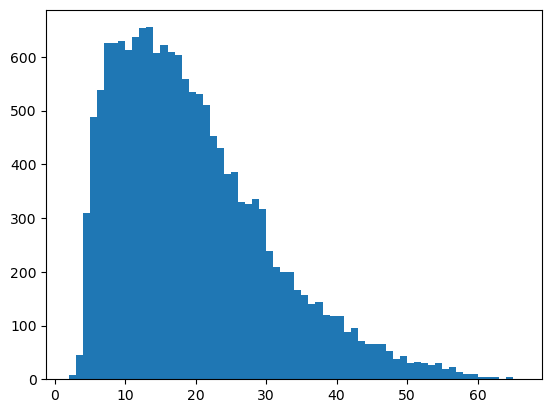

In [24]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths)))
plt.show()

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded_seq = pad_sequences(sequences, maxlen = 50, padding='post', truncating='post')
  return padded_seq

In [27]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [28]:
padded_train_seq[2]

array([ 17,   1,   7,   1,   5, 286,   2,   3, 495, 438,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [29]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


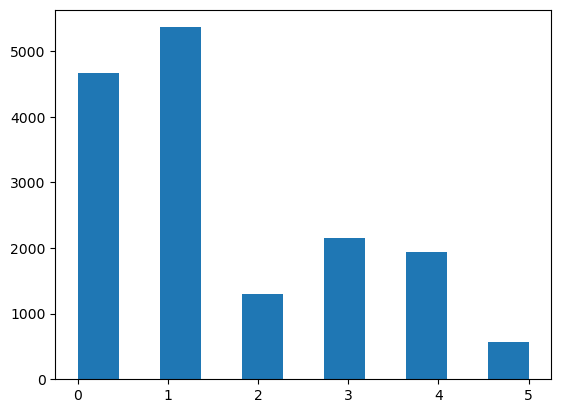

In [30]:
plt.hist(labels, bins = 11)
plt.show()

In [31]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [32]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [33]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [34]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [35]:
train_labels = names_to_ids(labels)
print(train_labels[2])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [36]:
maxlen = 50
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(1000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 31926 (124.71 KB)
Trainable params: 31926 (124.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [38]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [39]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [40]:
h = model.fit(
    padded_train_seq, train_labels, validation_data = (val_seq, val_labels),
    epochs=20,
    callbacks = [     # if for consecutive 2 epochs the accuracy does not change than the model training will stop
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 15s 21ms/step - loss: 1.3339 - accuracy: 0.4721 - val_loss: 0.9209 - val_accuracy: 0.6745
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.6954 - accuracy: 0.7544 - val_loss: 0.6344 - val_accuracy: 0.7755
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.5204 - accuracy: 0.8265 - val_loss: 0.6882 - val_accuracy: 0.7740
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.4411 - accuracy: 0.8526 - val_loss: 0.5076 - val_accuracy: 0.8410
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.4065 - accuracy: 0.8606 - val_loss: 0.4437 - val_accuracy: 0.8515
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3558 - accuracy: 0.8749 - val_loss: 0.4411 - val_accuracy: 0.8515
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3300 - accuracy: 0.8822 - val_loss: 0.4254 - val_accuracy: 0.849

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

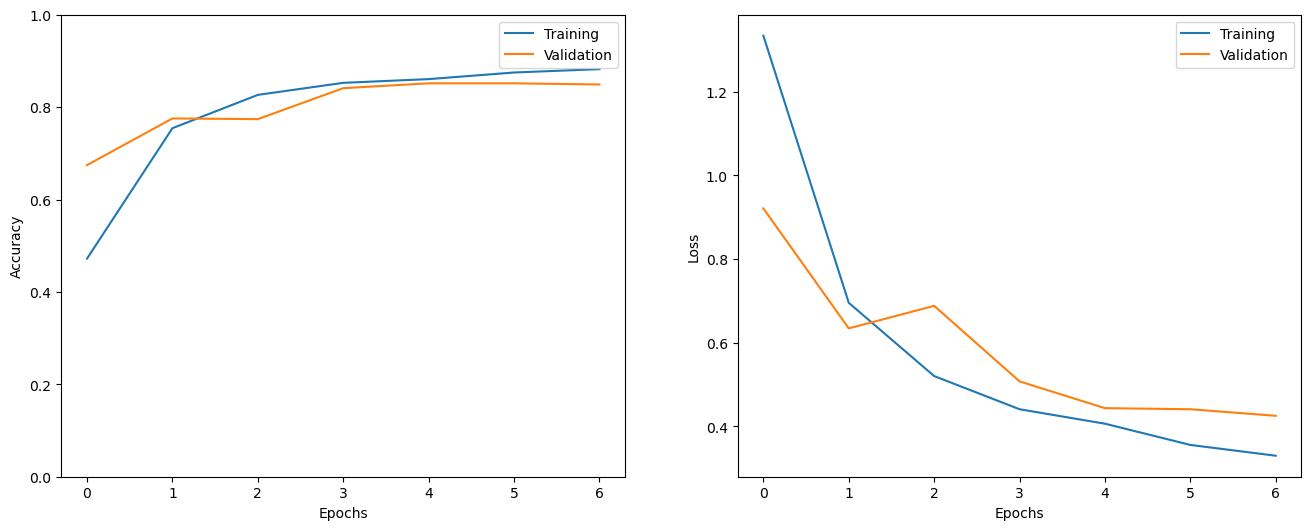

In [41]:
show_history(h)

In [42]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [43]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.4150 - accuracy: 0.8515


In [44]:
i = random.randint(0, len(test_labels) - 1)

print("Sentence: ", test_tweets[i])
print("Emotions: ", index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion: ',pred_class)

Sentence:  i sometimes feel a bit unwelcome
Emotions:  0
1/1 [==============================] - 1s 1s/step
Predicted Emotion:  0


In [45]:
#preds = model.predict_classes(test_seq)
preds = np.argmax(model.predict(test_seq), axis=1)

63/63 [==============================] - 0s 6ms/step


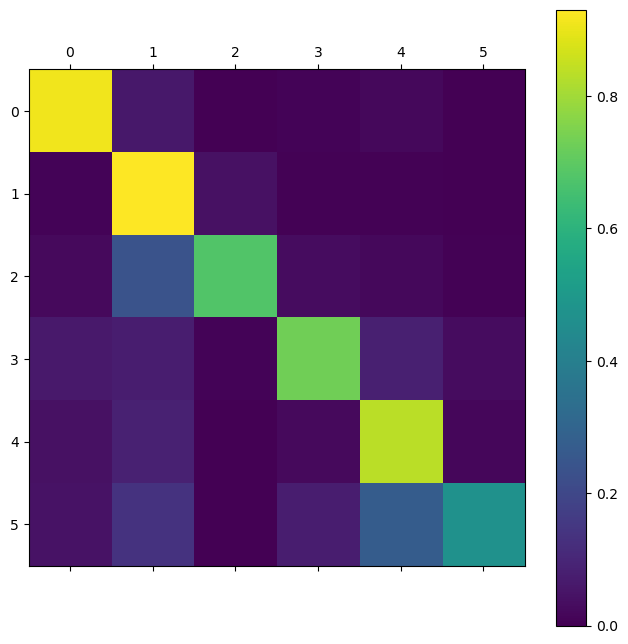

In [46]:
show_confusion_matrix(test_labels, preds, list(classes))

In [49]:
import tkinter as tk
from tkinter import messagebox

#import numpy as np
#from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_emotion(sentence):
    try:
        # Tokenize and prepare input
        sequence = tokenizer.texts_to_sequences([sentence])
        padded_sequence = pad_sequences(sequence, maxlen=50)  # Adjust maxlen as per your model's requirement
        
        # Predict using the model
        probabilities = model.predict(padded_sequence)[0]
        
        # Debug: Print probabilities
        print("Probabilities:", probabilities)
        
        # Get the predicted index and emotion
        pred_index = np.argmax(probabilities).astype('uint8')
        pred_emotion = index_to_class[pred_index]

        return pred_emotion
    except Exception as e:
        return f"Error: {str(e)}"


# GUI Functionality
def handle_prediction():
    sentence = input_text.get("1.0", tk.END).strip()
    if not sentence:
        messagebox.showerror("Input Error", "Please enter a sentence!")
        return
    
    emotion = predict_emotion(sentence)
    
    # Debug: Print the result
    print("Input Sentence:", sentence)
    print("Predicted Emotion:", emotion)
    
    result_label.config(text=f"Predicted Emotion: {emotion}")


# Function to start the GUI from within Jupyter Notebook
def launch_gui():
    root = tk.Tk()
    root.title("Tweet Emotion Recognition")

    # Input Text Box
    tk.Label(root, text="Enter your sentence:").pack(pady=5)
    global input_text
    input_text = tk.Text(root, height=5, width=50)
    input_text.pack(pady=5)

    # Predict Button
    predict_button = tk.Button(root, text="Predict Emotion", command=handle_prediction)
    predict_button.pack(pady=10)

    # Result Label
    global result_label
    result_label = tk.Label(root, text="Predicted Emotion: ", font=("Arial", 14))
    result_label.pack(pady=10)

    root.mainloop()

# Launch the GUI
launch_gui()

1/1 [==============================] - 0s 24ms/step
Probabilities: [0.15198623 0.64365023 0.04949661 0.0536072  0.0771116  0.02414818]
Input Sentence: i have seen heard and read over the past couple of days i am left feeling
Predicted Emotion: 1
